<img src="../images/logos/arm_logo.png" width=500 alt="ARM Logo"></img>

# Py-ART Basics with Xradar
---

## Overview
   
Within this notebook, we will cover:

1. General overview of Py-ART and its functionality
1. Reading data using Py-ART
1. An overview of the `pyart.Radar` object
1. Create a Plot of our Radar Data


## Prerequisites
| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Cartopy](https://foundations.projectpythia.org/core/cartopy/cartopy.html) | Helpful | Basic features |
| [Matplotlib Basics](https://foundations.projectpythia.org/core/matplotlib/matplotlib-basics.html) | Helpful | Basic plotting |
| [NumPy Basics](https://foundations.projectpythia.org/core/numpy/numpy-basics.html) | Helpful | Basic arrays |

- **Time to learn**: 45 minutes
---

## Imports

In [1]:
import os
import warnings

import cartopy.crs as ccrs
import matplotlib.pyplot as plt


import pyart
from pyart.testing import get_test_data
import xradar as xd

warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## An Overview of Py-ART

### History of the Py-ART

 * Development began to address the needs of ARM with the acquisition of a number of
   new scanning cloud and precipitation radar as part of the American Recovery Act.
 * The project has since expanded to work with a variety of weather radars and a wider user
   base including radar researchers and climate modelers.
 * The software has been released on GitHub as open source software under a BSD license.
   Runs on Linux, OS X. It also runs on Windows with more limited functionality.

### What can PyART Do?

Py-ART can be used for a variety of tasks from basic plotting to more complex
processing pipelines. Specific uses for Py-ART include:

 * Reading radar data in a variety of file formats.
 * Creating plots and visualization of radar data.
 * Correcting radar moments while in antenna coordinates, such as:
    * Doppler unfolding/de-aliasing.
    * Attenuation correction.
    * Phase processing using a Linear Programming method.
 * Mapping data from one or multiple radars onto a Cartesian grid.
 * Performing retrievals.
 * Writing radial and Cartesian data to NetCDF files.

## Reading in Data Using Py-ART

### Reading data in using `xradar.io.open_`

When reading in a radar file, we use the `pyart.io.read` module.

`pyart.io.read` can read a variety of different radar formats, such as Cf/Radial, ODIM_H5, etc.
The documentation on what formats can be read by xradar can be found here:

* [xradar readers Documentation](https://docs.openradarscience.org/projects/xradar/en/stable/importers.html)

Let's take a look at one of these readers:

In [2]:
?xd.io.open_cfradial1_datatree

Let's use a sample data file from `pyart` - which is [**cfradial** format](https://github.com/NCAR/CfRadial).

When we read this in, we get a [`pyart.Radar` object](https://arm-doe.github.io/pyart/API/generated/pyart.core.Radar.html#pyart.core.Radar)!

In [3]:
file = get_test_data("swx_20120520_0641.nc")
dt = xd.io.open_cfradial1_datatree(file)
dt

DataTree('root', parent=None)
│   Dimensions:            (sweep: 22)
│   Dimensions without coordinates: sweep
│   Data variables:
│       sweep_group_name   (sweep) <U8 704B 'sweep_0' 'sweep_1' ... 'sweep_21'
│       sweep_fixed_angle  (sweep) float64 176B ...
│       latitude           float64 8B ...
│       altitude           float64 8B ...
│       longitude          float64 8B ...
│   Attributes:
│       instrument_name:     xsapr-sg
│       platform_is_mobile:  False
│       history:             created by user scollis on evs346820 at 13-Nov-2012,...
├── DataTree('radar_parameters')
├── DataTree('georeferencing_correction')
├── DataTree('sweep_0')
│       Dimensions:                            (azimuth: 400, range: 667)
│       Coordinates:
│           time                               (azimuth) datetime64[ns] 3kB 2011-05-2...
│         * range                              (range) float64 5kB 0.0 ... 3.996e+04
│         * azimuth                            (azimuth) float64 3kB 0.8281 ... 360.0
│           elevation                          (azimuth) float64 3kB ...
│           latitude                           float64 8B ...
│           longitude                          float64 8B ...
│           altitude                           float64 8B ...
│       Data variables: (12/16)
│           corrected_reflectivity_horizontal  (azimuth, range) float32 1MB ...
│           reflectivity_horizontal            (azimuth, range) float32 1MB ...
│           recalculated_diff_phase            (azimuth, range) float32 1MB ...
│           specific_attenuation               (azimuth, range) float32 1MB ...
│           unf_dp_phase_shift                 (azimuth, range) float32 1MB ...
│           mean_doppler_velocity              (azimuth, range) float32 1MB ...
│           ...                                 ...
│           diff_reflectivity                  (azimuth, range) float32 1MB ...
│           proc_dp_phase_shift                (azimuth, range) float32 1MB ...
│           copol_coeff                        (azimuth, range) float32 1MB ...
│           sweep_mode                         <U20 80B 'azimuth_surveillance'
│           sweep_number                       int32 4B ...
│           sweep_fixed_angle                  float64 8B ...
├── DataTree('sweep_1')
│       Dimensions:                            (azimuth: 400, range: 667)
│       Coordinates:
│           time                               (azimuth) datetime64[ns] 3kB 2011-05-2...
│         * range                              (range) float64 5kB 0.0 ... 3.996e+04
│         * azimuth                            (azimuth) float64 3kB 0.8438 ... 359.9
│           elevation                          (azimuth) float64 3kB ...
│           latitude                           float64 8B ...
│           longitude                          float64 8B ...
│           altitude                           float64 8B ...
│       Data variables: (12/16)
│           corrected_reflectivity_horizontal  (azimuth, range) float32 1MB ...
│           reflectivity_horizontal            (azimuth, range) float32 1MB ...
│           recalculated_diff_phase            (azimuth, range) float32 1MB ...
│           specific_attenuation               (azimuth, range) float32 1MB ...
│           unf_dp_phase_shift                 (azimuth, range) float32 1MB ...
│           mean_doppler_velocity              (azimuth, range) float32 1MB ...
│           ...                                 ...
│           diff_reflectivity                  (azimuth, range) float32 1MB ...
│           proc_dp_phase_shift                (azimuth, range) float32 1MB ...
│           copol_coeff                        (azimuth, range) float32 1MB ...
│           sweep_mode                         <U20 80B 'azimuth_surveillance'
│           sweep_number                       int32 4B ...
│           sweep_fixed_angle                  float64 8B ...
├── DataTree('sweep_2')
│       Dimensions:                            (azimu

### Investigate the [`xradar` object](https://docs.openradarscience.org/projects/xradar/en/stable/notebooks/CfRadial1.html)

Within this [`xradar` object](https://docs.openradarscience.org/projects/xradar/en/stable/notebooks/CfRadial1.html) object are the actual data fields, each stored in a different group, mimicking the FM301/cfradial2 data standard.

This is where data such as reflectivity and velocity are stored.

To see what fields are present we can add the fields and keys additions to the variable where the radar object is stored.

In [4]:
dt["sweep_0"]

DataTree('sweep_0', parent="root")
    Dimensions:                            (azimuth: 400, range: 667)
    Coordinates:
        time                               (azimuth) datetime64[ns] 3kB 2011-05-2...
      * range                              (range) float64 5kB 0.0 ... 3.996e+04
      * azimuth                            (azimuth) float64 3kB 0.8281 ... 360.0
        elevation                          (azimuth) float64 3kB ...
        latitude                           float64 8B ...
        longitude                          float64 8B ...
        altitude                           float64 8B ...
    Data variables: (12/16)
        corrected_reflectivity_horizontal  (azimuth, range) float32 1MB ...
        reflectivity_horizontal            (azimuth, range) float32 1MB ...
        recalculated_diff_phase            (azimuth, range) float32 1MB ...
        specific_attenuation               (azimuth, range) float32 1MB ...
        unf_dp_phase_shift                 (azimuth, range) float32 1MB ...
        mean_doppler_velocity              (azimuth, range) float32 1MB ...
        ...                                 ...
        diff_reflectivity                  (azimuth, range) float32 1MB ...
        proc_dp_phase_shift                (azimuth, range) float32 1MB ...
        copol_coeff                        (azimuth, range) float32 1MB ...
        sweep_mode                         <U20 80B 'azimuth_surveillance'
        sweep_number                       int32 4B ...
        sweep_fixed_angle                  float64 8B ...

#### Extract a sample data field

The fields are stored in a dictionary, each containing coordinates, units and more.
All can be accessed by just adding the fields addition to the radar object variable.

For an individual field, we add a string in brackets after the fields addition to see
the contents of that field.

Let's take a look at `'corrected_reflectivity_horizontal'`, which is a common field to investigate.

In [5]:
print(dt["sweep_0"]["corrected_reflectivity_horizontal"])

<xarray.DataArray 'corrected_reflectivity_horizontal' (azimuth: 400, range: 667)> Size: 1MB
[266800 values with dtype=float32]
Coordinates:
    time       (azimuth) datetime64[ns] 3kB 2011-05-20T06:42:11.039436300 ......
  * range      (range) float64 5kB 0.0 60.0 120.0 ... 3.99e+04 3.996e+04
  * azimuth    (azimuth) float64 3kB 0.8281 1.719 2.594 ... 358.1 359.0 360.0
    elevation  (azimuth) float64 3kB ...
    latitude   float64 8B ...
    longitude  float64 8B ...
    altitude   float64 8B ...
Attributes:
    units:          dBZ
    long_name:      equivalent_reflectivity_factor
    valid_min:      -45.0
    valid_max:      80.0
    standard_name:  equivalent_reflectivity_factor


We can go even further in the dictionary and access the actual reflectivity data.

We use add `.data` at the end, which will extract the **data array** (which is a numpy array) from the dictionary.

In [6]:
reflectivity = dt["sweep_0"]["corrected_reflectivity_horizontal"].data
print(type(reflectivity), reflectivity)

<class 'numpy.ndarray'> [[ -5.6171875   1.8984375 -10.0703125 ...  -2.6796875  -1.5390625
          nan]
 [ -5.0390625   2.625     -11.484375  ...  -8.984375          nan
          nan]
 [ -5.4375      2.4765625 -10.7265625 ...         nan         nan
          nan]
 ...
 [ -6.15625     0.7734375 -12.4140625 ...  -8.5234375         nan
   -6.265625 ]
 [ -8.6875      3.4609375 -10.796875  ... -19.882812          nan
          nan]
 [ -5.671875    2.28125    -8.1171875 ...         nan -13.4765625
          nan]]


Lets' check the size of this array...

In [7]:
reflectivity.shape

(400, 667)

This reflectivity data array, numpy array, is a two-dimensional array with dimensions:
- Range (distance away from the radar)
- Azimuth (direction around the radar)

In [8]:
dt["sweep_0"].dims

Frozen({'azimuth': 400, 'range': 667})

If we wanted to look the 300th ray, at the second gate, we would use something like the following:

In [9]:
print(reflectivity[300, 2])

-2.96875


We can also select a specific azimuth if desired, using the xarray syntax:

In [10]:
dt["sweep_0"].sel(azimuth=180, method="nearest")

DataTree('sweep_0', parent=None)
    Dimensions:                            (range: 667)
    Coordinates:
        time                               datetime64[ns] 8B 2011-05-20T06:42:18....
      * range                              (range) float64 5kB 0.0 ... 3.996e+04
        azimuth                            float64 8B 179.9
        elevation                          float64 8B ...
        latitude                           float64 8B ...
        longitude                          float64 8B ...
        altitude                           float64 8B ...
    Data variables: (12/16)
        corrected_reflectivity_horizontal  (range) float32 3kB -5.57 1.75 ... -2.031
        reflectivity_horizontal            (range) float32 3kB ...
        recalculated_diff_phase            (range) float32 3kB ...
        specific_attenuation               (range) float32 3kB ...
        unf_dp_phase_shift                 (range) float32 3kB ...
        mean_doppler_velocity              (range) float32 3kB ...
        ...                                 ...
        diff_reflectivity                  (range) float32 3kB ...
        proc_dp_phase_shift                (range) float32 3kB ...
        copol_coeff                        (range) float32 3kB ...
        sweep_mode                         <U20 80B 'azimuth_surveillance'
        sweep_number                       int32 4B ...
        sweep_fixed_angle                  float64 8B ...

## Plotting our Radar Data

### An Overview of Py-ART Plotting Utilities

Now that we have loaded the data and inspected it, the next logical thing to do is to visualize the data! Py-ART's visualization functionality is done through the objects in the [pyart.graph](https://arm-doe.github.io/pyart/API/generated/pyart.graph.html) module.

In Py-ART there are 4 primary visualization classes in pyart.graph:

* [RadarDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.html)
* [RadarMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.html)
* [AirborneRadarDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.AirborneRadarDisplay.html)

Plotting grid data
* [GridMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.GridMapDisplay.html)

### Use the [RadarMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.html) with our data

For the this example, we will be using `RadarMapDisplay`, using Cartopy to deal with geographic coordinates.


We start by creating a figure first, and adding our traditional radar methods to the xradar object.

In [11]:
fig = plt.figure(figsize=[10, 10])
radar = pyart.xradar.Xradar(dt)

<Figure size 1000x1000 with 0 Axes>

Once we have a figure, let's add our `RadarMapDisplay`

In [12]:
fig = plt.figure(figsize=[10, 10])
display = pyart.graph.RadarMapDisplay(radar)

<Figure size 1000x1000 with 0 Axes>

Adding our map display without specifying a field to plot **won't do anything** we need to specifically add a field to field using `.plot_ppi_map()`

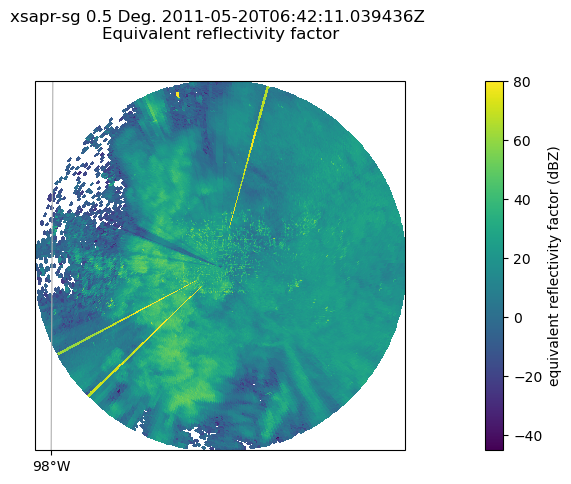

In [13]:
display.plot_ppi_map("corrected_reflectivity_horizontal")

By default, it will plot the elevation scan, the the default colormap from `Matplotlib`... let's customize!

We add the following arguements:
- `sweep=3` - The fourth elevation scan (since we are using Python indexing)
- `vmin=-20` - Minimum value for our plotted field/colorbar
- `vmax=60` - Maximum value for our plotted field/colorbar
- `projection=ccrs.PlateCarree()` - Cartopy latitude/longitude coordinate system
- `cmap='pyart_HomeyerRainbow'` - Colormap to use, selecting one provided by PyART 

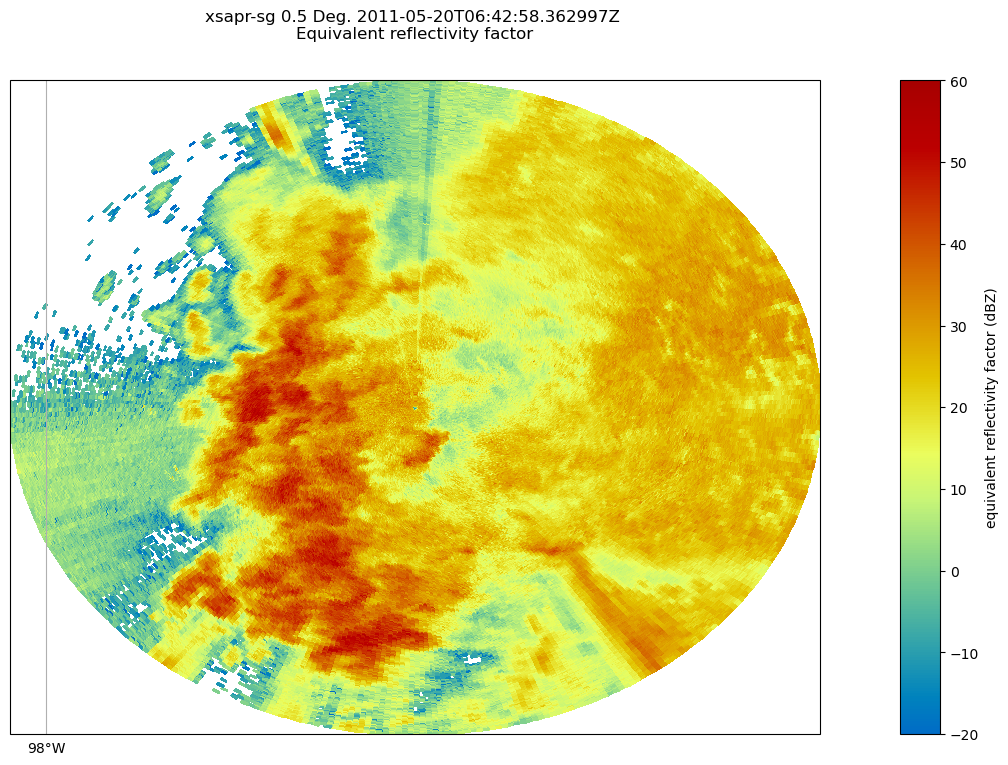

In [14]:
fig = plt.figure(figsize=[12, 12])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    "corrected_reflectivity_horizontal",
    sweep=3,
    vmin=-20,
    vmax=60,
    projection=ccrs.PlateCarree(),
    cmap="pyart_HomeyerRainbow",
)
plt.show()

You can change many parameters in the graph by changing the arguments to plot_ppi_map. As you can recall from earlier. simply view these arguments in a Jupyter notebook by typing:

In [15]:
?display.plot_ppi_map

For example, let's change the colormap to something different

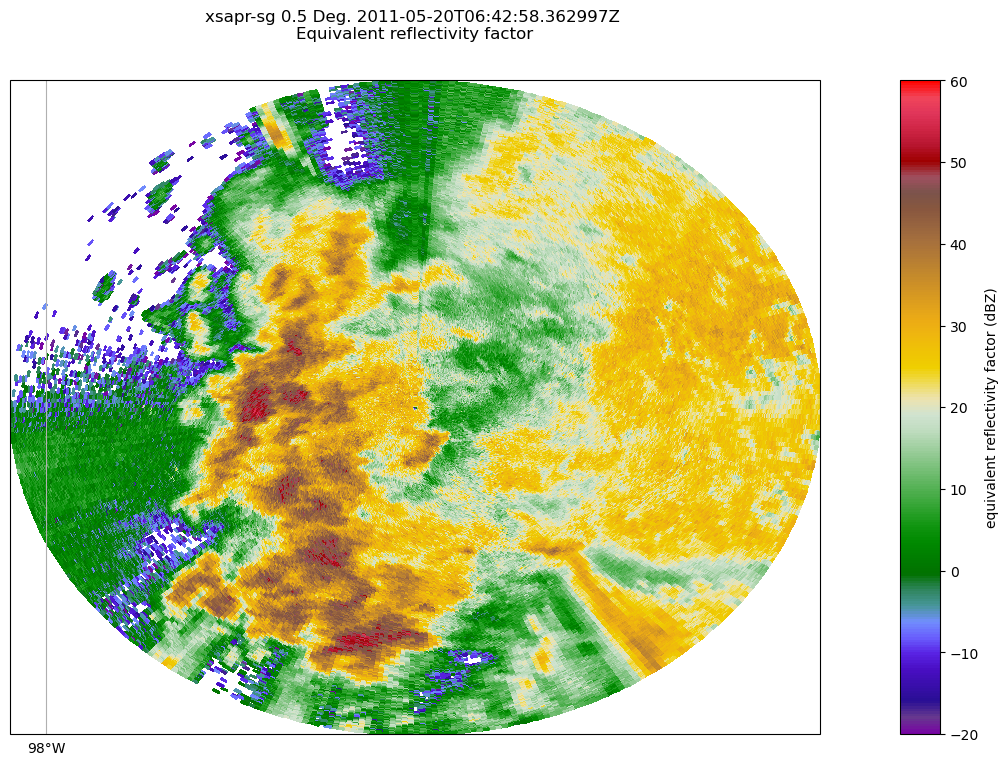

In [16]:
fig = plt.figure(figsize=[12, 12])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    "corrected_reflectivity_horizontal",
    sweep=3,
    vmin=-20,
    vmax=60,
    projection=ccrs.PlateCarree(),
    cmap="pyart_Carbone42",
)
plt.show()

Or, let's view a different elevation scan! To do this, change the sweep parameter in the plot_ppi_map function.

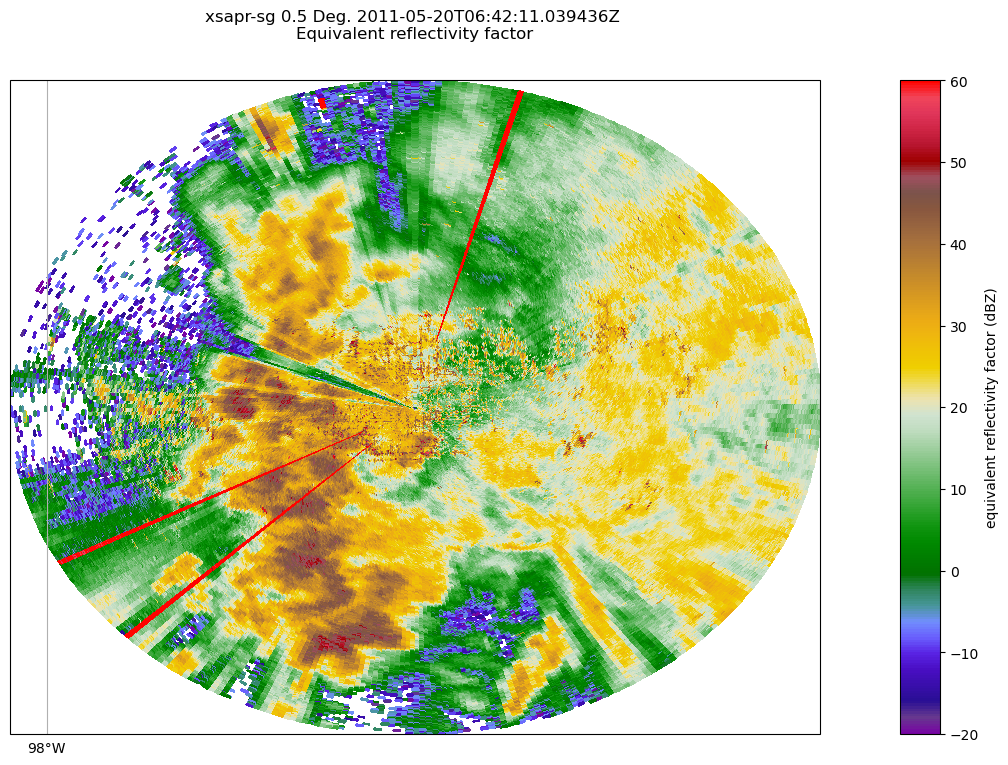

In [17]:
fig = plt.figure(figsize=[12, 12])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    "corrected_reflectivity_horizontal",
    sweep=0,
    vmin=-20,
    vmax=60,
    projection=ccrs.PlateCarree(),
    cmap="pyart_Carbone42",
)
plt.show()

Let's take a look at a different field - for example, correlation coefficient (`corr_coeff`)

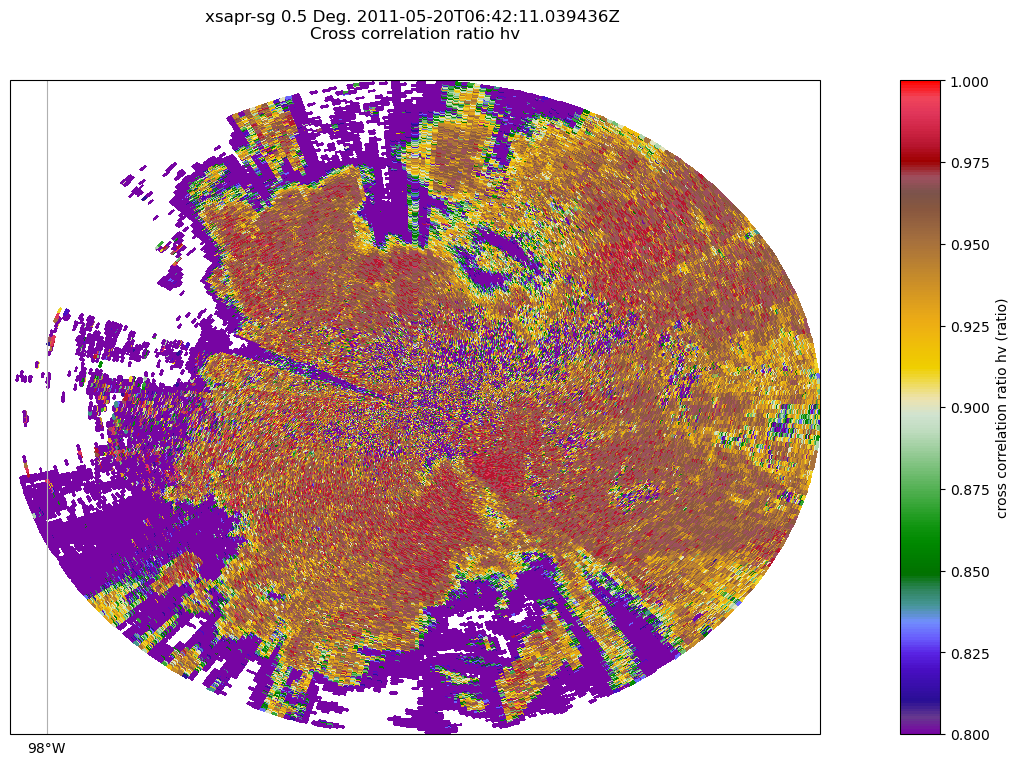

In [18]:
fig = plt.figure(figsize=[12, 12])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    "copol_coeff",
    sweep=0,
    vmin=0.8,
    vmax=1.0,
    projection=ccrs.PlateCarree(),
    cmap="pyart_Carbone42",
)
plt.show()

---
## Summary
Within this notebook, we covered the basics of working with radar data using `pyart`, including:
- Reading in a file using `xradar.io`
- Investigating the `xradar` object
- Visualizing radar data using the `RadarMapDisplay`

### What's Next
In the next few notebooks, we walk through gridding radar data, applying data cleaning methods, and advanced visualization methods!

## Resources and References
Py-ART essentials links:

* [Landing page](https://arm-doe.github.io/pyart/)
* [Examples](https://arm-doe.github.io/pyart/examples/index.html)
* [Source Code](https://github.com/ARM-DOE/pyart)
* [Mailing list](https://groups.google.com/group/pyart-users/)
* [Issue Tracker](https://github.com/ARM-DOE/pyart/issues)